In [1]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Analysis of Property Sales

You are provided with a real dataset gathered from public sources that includes date, price and basic property information from real estate transactions in Melbourne. There are many undefined and incorrect values in the dataset, but this is common in real data. Your task will be to clean and prepare the data, then conduct some basic analysis on the cleaned data using summary statistics and visualization. This notebook should include markdown cells to structure your work, explain your reasoning and interpret results as well as plots to communicate your findings. The questions focus on residential properties, however, the data may also contain commercial/industrial properties, car spaces etc.

### Description of Fields
* suburb - Suburb
* address - Address
* bedrooms - Number of bedrooms
* price - Price in Australian dollars
* method -
    * S - property sold;
    * SP - property sold prior;
    * PI - property passed in;
    * PN - sold prior not disclosed;
    * SN - sold not disclosed;
    * NB - no bid;
    * VB - vendor bid;
    * W - withdrawn prior to auction;
    * SA - sold after auction;
    * SS - sold after auction price not disclosed.
    * N/A - price or highest bid not available.
* type -
    * h - house, cottage, villa, semi, terrace;
    * u - unit, duplex;
    * t - townhouse;
    * dev site - development site;
    * o res - other residential.
* date - Date sold
* distance - Distance from CBD in kilometres
* region_name - Region
* bathrooms - Number of bathrooms
* car - Number of car spaces
* land_size - Land size in square metres
* building_area - Building size in square metres
* year_built - Year of primary construction
* council_area - Governing council for the area
* latitude
* longitude

Original dataset credit: [Tony Pino](https://www.kaggle.com/anthonypino).

## Tasks

1. Cleaning and Preparation
    * A) Remove all rows where the price is not known.
    * B) Remove all rows where the building area is not known or not realistic. Briefly justify an appropriate lower and upper bound.
    * C) Convert the date column to the pandas datetime type.
    * D) (Optional) Remove, with justification, any other rows you think appropriate in this context.
2. Analysis Questions
    * A) After cleaning, was more money spent on houses or units overall? How many of each were sold?
    * B) Plot the relationship between building area and price, is this what you would expect?
    * C) If you limit your analysis to only 2 bedroom properties, are units or houses more expensive? Plot and interpret the distribution of prices for each.
    * D) Split your data into separate dataframes for 2016, 2017 and 2018. Is the average price of a house going up or down in the period? Is the trend the same for units?
  

**Action:** Reading the data file and set as a variable

In [2]:
melb = pd.read_csv(os.path.join("files", "melbourne_data.csv"))
melb.head()

,suburb,address,bedrooms,type,price,method,date,distance,postcode,bathrooms,car,land_size,building_area,year_built,council_area,latitude,longtitude,region
0,Abbotsford,68 Studley St,2,h,NaN,SS,3/09/2016,2.5,3067.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan
1,Abbotsford,85 Turner St,2,h,1480000.0,S,3/12/2016,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,4/02/2016,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,4/02/2016,2.5,3067.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,4/03/2017,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan


#### 1A) Remove all rows where the price is not known

In [3]:
melb_with_price = melb.dropna(subset=['price'])
melb_with_price.head()

,suburb,address,bedrooms,type,price,method,date,distance,postcode,bathrooms,car,land_size,building_area,year_built,council_area,latitude,longtitude,region
1,Abbotsford,85 Turner St,2,h,1480000.0,S,3/12/2016,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,4/02/2016,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,4/03/2017,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan
5,Abbotsford,40 Federation La,3,h,850000.0,PI,4/03/2017,2.5,3067.0,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan
6,Abbotsford,55a Park St,4,h,1600000.0,VB,4/06/2016,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan


#### 1B) Remove all rows where the building area is not known or not realistic. Briefly justify an appropriate lower and upper bound.

**Action:** Create a new dataframe where 'price' and 'building_area' are known

In [4]:
melb_with_price_and_build_area = melb_with_price.dropna(subset=['building_area'])
print(melb_with_price_and_build_area['price'].describe())
print(melb_with_price_and_build_area['building_area'].describe())

count    1.065600e+04
mean     1.087051e+06
std      6.771761e+05
min      1.310000e+05
25%      6.400000e+05
50%      8.925000e+05
75%      1.330000e+06
max      9.000000e+06
Name: price, dtype: float64
count    10656.000000
mean       156.834586
std        449.222791
min          0.000000
25%        100.000000
50%        133.000000
75%        182.000000
max      44515.000000
Name: building_area, dtype: float64


Price and Building Area both have positive integers as values.

**Action:** Create a boxplot to observe for outliers

Text(0.5, 1.0, 'Distribution Of Building Area')

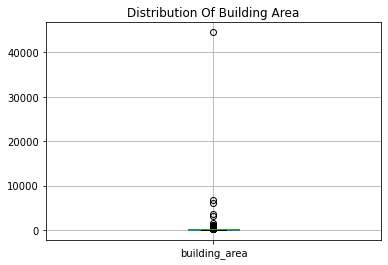

In [5]:
melb_with_price_and_build_area.boxplot(column = ['building_area']) 
plt.title('Distribution Of Building Area')

There is one outlier that is above 40k, which is not realistic.

**Action:** Remove values above 10000

In [6]:
melb_with_price_and_build_area = melb_with_price_and_build_area[melb_with_price_and_build_area['building_area'] < 10000]

**Action:** Boxplot to observe series after removing the outlier

Text(0.5, 1.0, 'Distribution Of Building Area')

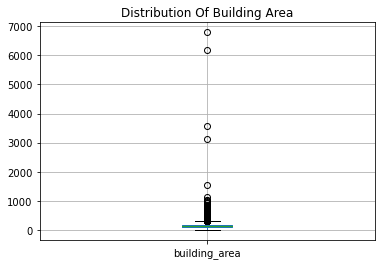

In [7]:
melb_with_price_and_build_area.boxplot(column = ['building_area']) 
plt.title('Distribution Of Building Area')

Building area above 2000 are likely to be commercial and industrial buildings.

**Action:** Remove value above 2000

Text(0.5, 1.0, 'Distribution of Building Area')

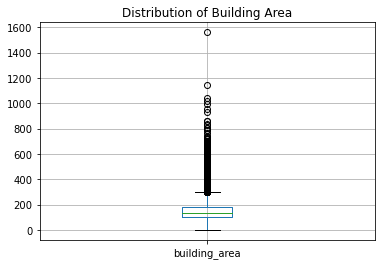

In [8]:
melb_with_price_and_build_area = melb_with_price_and_build_area[melb_with_price_and_build_area['building_area'] < 2000]
melb_with_price_and_build_area.boxplot(column = ['building_area']) 
plt.title('Distribution of Building Area')

The data now looks to only include residential buildings.

Describe the cleaned building area data

In [9]:
print(melb_with_price_and_build_area['building_area'].describe())

count    10651.000000
mean       150.884926
std         87.532425
min          0.000000
25%        100.000000
50%        133.000000
75%        181.000000
max       1561.000000
Name: building_area, dtype: float64


Minimum building area of 0 is likely to be land only.
Maximum building area of 1561 is likely to be a large house.

#### 1C)  Convert the date column to the pandas datetime type

In [10]:
melb_with_price_and_build_area['date'] = pd.to_datetime(melb_with_price_and_build_area['date'])
melb_with_price_and_build_area.head()

,suburb,address,bedrooms,type,price,method,date,distance,postcode,bathrooms,car,land_size,building_area,year_built,council_area,latitude,longtitude,region
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,2016-04-02,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,2017-04-03,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan
6,Abbotsford,55a Park St,4,h,1600000.0,VB,2016-04-06,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,2016-07-05,2.5,3067.0,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan
14,Abbotsford,98 Charles St,2,h,1636000.0,S,2016-08-10,2.5,3067.0,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan


#### 2A) After cleaning, was more money spent on houses or units overall? How many of each were sold?

**Action:** Select type and price

In [11]:
pd.set_option('float_format', '{:f}'.format)
melb_type_price = melb_with_price_and_build_area[['type','price']].groupby(['type']).mean()
melb_type_price

,price
type,
h,1218845.303401
t,911172.302072
u,592575.485507


**Action:** Plot a bar chart to visualize the price by type

Text(0, 0.5, 'Price')

<Figure size 864x432 with 0 Axes>

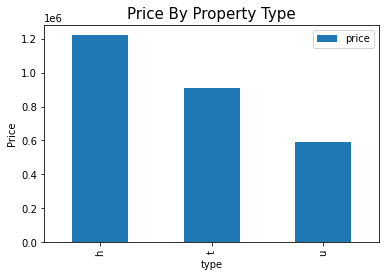

In [33]:
plt.figure(figsize=(12,6))
melb_type_price.plot(kind='bar')
plt.title('Price By Property Type', fontsize=15)
plt.ylabel('Price')

Average price of houses (h) were higher than units (u) and townhouses (t).

**Action:** Find out many of each type were sold:

In [52]:
# initialize list of sale count by property type
data = [['house', melb_with_price_and_build_area.type.value_counts().h], ['units', melb_with_price_and_build_area.type.value_counts().u], ['townhouses', melb_with_price_and_build_area.type.value_counts().t]]
  
# Create the DataFrame
property_type_sold = pd.DataFrame(data, columns=['Property Type', 'Quantity Sold']).set_index('Property Type')
  
# print dataframe.
property_type_sold

,Quantity Sold
Property Type,
house,7940
units,1794
townhouses,917


Number of houses sold: 7940
Number of units sold: 1794
Number of townhouses sold: 917


<Figure size 864x432 with 0 Axes>

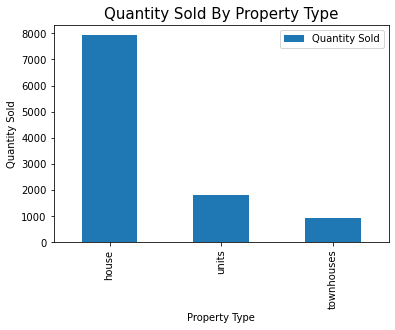

In [54]:
plt.figure(figsize=(12,6))
property_type_sold.plot(kind='bar')
plt.title('Quantity Sold By Property Type', fontsize=15)
plt.ylabel('Quantity Sold')

print('Number of houses sold:',melb_with_price_and_build_area.type.value_counts().h)
print('Number of units sold:',melb_with_price_and_build_area.type.value_counts().u)
print('Number of townhouses sold:',melb_with_price_and_build_area.type.value_counts().t)

- Number of houses sold: 7940
- Number of units sold: 1794
- Number of townhouses sold: 917

#### 2B) Plot the relationship between building area and price, is this what you would expect?

**Action:** Plot a lmplot to visualize Building Area vs Price

Text(0.5, 1.0, 'Building Area vs Price')

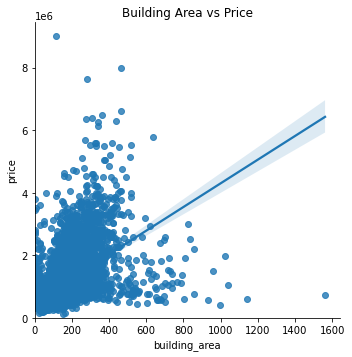

In [13]:
import seaborn as sns
sns.lmplot(x='building_area', y='price', data=melb_with_price_and_build_area)

plt.xlim(0, None)
plt.ylim(0, None)
plt.title("Building Area vs Price")

As I would expect - The larger the building area, the larger the price of the property

#### 2C) If you limit your analysis to only 2 bedroom properties, are units or houses more expensive? 

**Action:** Plot and interpret the distribution of prices for each

**Action:** Create dataframe to only include 2 bedroom properties:

In [14]:
melb_with_price_and_build_area_2_bed = melb_with_price_and_build_area[melb_with_price_and_build_area['bedrooms'] == 2]
melb_with_price_and_build_area_2_bed.head()

,suburb,address,bedrooms,type,price,method,date,distance,postcode,bathrooms,car,land_size,building_area,year_built,council_area,latitude,longtitude,region
2,Abbotsford,25 Bloomburg St,2,h,1035000.000000,S,2016-04-02,2.500000,3067.000000,1.000000,0.000000,156.000000,79.000000,1900.000000,Yarra City Council,-37.807900,144.993400,Northern Metropolitan
14,Abbotsford,98 Charles St,2,h,1636000.000000,S,2016-08-10,2.500000,3067.000000,1.000000,2.000000,256.000000,107.000000,1890.000000,Yarra City Council,-37.806000,144.995400,Northern Metropolitan
18,Abbotsford,10 Valiant St,2,h,1097000.000000,S,2016-08-10,2.500000,3067.000000,1.000000,2.000000,220.000000,75.000000,1900.000000,Yarra City Council,-37.801000,144.998900,Northern Metropolitan
25,Abbotsford,123/56 Nicholson St,2,u,750000.000000,S,2016-12-11,2.500000,3067.000000,2.000000,1.000000,0.000000,94.000000,2009.000000,Yarra City Council,-37.807800,144.996500,Northern Metropolitan
30,Abbotsford,16 William St,2,h,1310000.000000,S,2016-10-15,2.500000,3067.000000,1.000000,2.000000,238.000000,97.000000,1890.000000,Yarra City Council,-37.809000,144.997600,Northern Metropolitan


**Action:** Select type and price

In [15]:
pd.set_option('float_format', '{:f}'.format)
melb_with_price_and_build_area_2_bed_mean = melb_with_price_and_build_area_2_bed[['type','price']].groupby(['type']).mean()
melb_with_price_and_build_area_2_bed_mean

,price
type,
h,973528.993103
t,694386.842105
u,593633.978147


For 2 bedrooms, the average price of houses were also higher than units and townhouses.

**Action:** Plot and interpret the distribution of prices for each:

Text(0.5, 1.0, 'Distribution Of Price By Type')

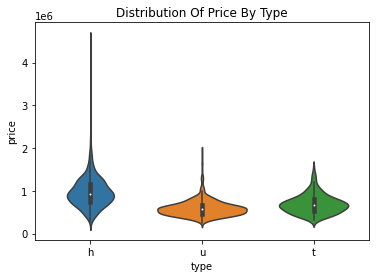

In [16]:
sns.violinplot(x='type', y='price', data=melb_with_price_and_build_area_2_bed, s=2)
plt.title('Distribution Of Price By Type')

Houses have a wider range of prices, with a small number at the very top of the scale. Majority of units are within the average range, with a small number above the range. Majority of townhouses are within the average range, with a very small number above the range.

#### 2D) Split your data into separate dataframes for 2016, 2017 and 2018. 

**Action:** Create new dataframes for 2016, 2017 and 2018 data

In [17]:
melb_with_price_and_build_area_2016 = melb_with_price_and_build_area[(melb_with_price_and_build_area['date'] > '2016-01-01') & (melb_with_price_and_build_area['date'] < '2016-12-31')]
melb_with_price_and_build_area_2017 = melb_with_price_and_build_area[(melb_with_price_and_build_area['date'] > '2017-01-01') & (melb_with_price_and_build_area['date'] < '2017-12-31')]
melb_with_price_and_build_area_2018 = melb_with_price_and_build_area[(melb_with_price_and_build_area['date'] > '2018-01-01') & (melb_with_price_and_build_area['date'] < '2018-12-31')]

**Action:** Calculate the average prices of all homes across the 3 years:

In [18]:
melb_with_price_and_build_area_2016 = melb_with_price_and_build_area_2016[['type','price']].groupby(['type']).mean()
melb_with_price_and_build_area_2017= melb_with_price_and_build_area_2017[['type','price']].groupby(['type']).mean()
melb_with_price_and_build_area_2018= melb_with_price_and_build_area_2018[['type','price']].groupby(['type']).mean()

Average prices in 2016:               price
type               
h    1334879.540302
t     848017.611940
u     577570.995490
Average prices in 2017:               price
type               
h    1180656.941069
t     955449.612840
u     607993.245536
Average prices in 2018:               price
type               
h    1125504.202923
t     887617.647059
u     546636.363636


**Action:** Add year as a new column in the dataframes

In [77]:
# Add column for year for 2016
melb_with_price_and_build_area_2016['Year'] = '2016'

# Add column for year for 2017
melb_with_price_and_build_area_2017['Year'] = '2017'

# Add column for year for 2018
melb_with_price_and_build_area_2018['Year'] = '2018'

**Action:** Union all dataframes into a single dataframe

In [120]:
type_price_year = pd.concat([melb_with_price_and_build_area_2016, melb_with_price_and_build_area_2017,melb_with_price_and_build_area_2018])
type_price_year

,price,Year
type,,
h,1334879.540302,2016
t,848017.611940,2016
u,577570.995490,2016
h,1180656.941069,2017
t,955449.612840,2017
u,607993.245536,2017
h,1125504.202923,2018
t,887617.647059,2018
u,546636.363636,2018


**Action:** Add a column for property type

In [121]:
type_price_year['property_type'] = type_price_year.index
type_price_year

,price,Year,property_type
type,,,
h,1334879.540302,2016,h
t,848017.611940,2016,t
u,577570.995490,2016,u
h,1180656.941069,2017,h
t,955449.612840,2017,t
u,607993.245536,2017,u
h,1125504.202923,2018,h
t,887617.647059,2018,t
u,546636.363636,2018,u


**Action:** Plot a chart to visualize the property prices by type, over the years

Text(0.5, 1.0, 'Price By Property Type - From 2016 to 2018')

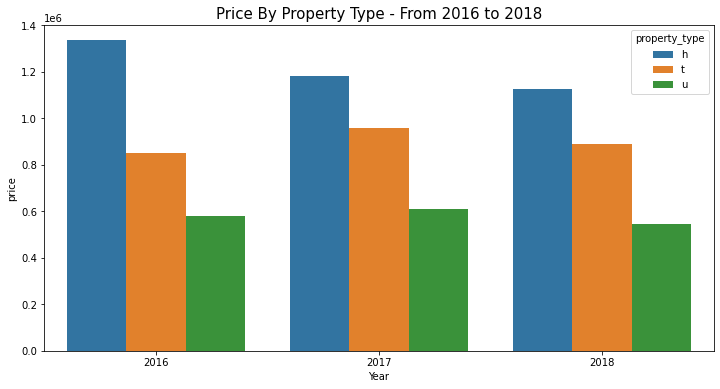

In [124]:
plt.figure(figsize=(12,6))
sns.barplot(x="Year", y="price", data=type_price_year, hue='property_type')
plt.title("Price By Property Type - From 2016 to 2018", fontsize=15)

#### Analysis - Is the average price of a house going up or down in the period?

- The average price of a house (h) has gone down over the period 2016 to 2018

#### Analysis - Is the trend the same for units?

- The trend was not the same for units (u) - where it went up in 2017 and then down in 2018 to a level even lower than the 2016 average.

## 3) Challenge

Find the suburbs that have the highest and lowest proportion of sales were units. If you look them up on a map, are these suburbs where you expect them to be? Why?

**Action:** Create new dataframe with columns suburb and type

In [61]:
melb_suburb_type = melb_with_price_and_build_area[['suburb', 'type']]
melb_suburb_type = pd.DataFrame(melb_suburb_type)

#### Total count of sales:

In [62]:
total_count = melb_suburb_type.type.count()
total_count

10651

**Action:** Calculate the proportion of total count:

In [63]:
proportion = 1 / total_count
proportion

9.388789784996713e-05

**Action:** Add column to dataframe for proportion:

In [64]:
melb_suburb_type['proportion'] = proportion
melb_suburb_type_proportion = melb_suburb_type[['suburb','type', 'proportion']].groupby(['suburb','type']).sum()
melb_suburb_type_proportion.head()

proportion
suburb     type            
Abbotsford h       0.003474
           u       0.000939
Aberfeldie h       0.002253
           t       0.000282
           u       0.000376

**Action:** Unstack the dataframe

In [65]:
melb_suburb_type_proportion = melb_suburb_type_proportion.unstack(level='type')
melb_suburb_type_proportion

proportion                  
type                  h        t        u
suburb                                   
Abbotsford     0.003474      NaN 0.000939
Aberfeldie     0.002253 0.000282 0.000376
Airport West   0.003568 0.000939 0.000751
Albanvale      0.000469      NaN      NaN
Albert Park    0.003568      NaN 0.000282
...                 ...      ...      ...
Wonga Park     0.000188      NaN      NaN
Wyndham Vale   0.001596      NaN      NaN
Yallambie      0.001784      NaN      NaN
Yarra Glen     0.000094      NaN      NaN
Yarraville     0.010140 0.000751 0.001127

[324 rows x 3 columns]

There are two levels of columns in the dataframe, proportion and type. Recommended to combine to a single column for a cleaner dataframe for analysis.

**Action:** Flatten the column names to 1 level:

In [66]:
melb_suburb_type_proportion.columns = melb_suburb_type_proportion.columns.to_flat_index().str.join('_')

In [67]:
melb_suburb_type_proportion

,proportion_h,proportion_t,proportion_u
suburb,,,
Abbotsford,0.003474,NaN,0.000939
Aberfeldie,0.002253,0.000282,0.000376
Airport West,0.003568,0.000939,0.000751
Albanvale,0.000469,NaN,NaN
Albert Park,0.003568,NaN,0.000282
...,...,...,...
Wonga Park,0.000188,NaN,NaN
Wyndham Vale,0.001596,NaN,NaN
Yallambie,0.001784,NaN,NaN


**Action:** Sort by top 5 and bottom 5 unit proportions

In [68]:
top_5_proportion_u = melb_suburb_type_proportion.sort_values(by=['proportion_u'], ascending=False).head(5)

In [69]:
bottom_5_proportion_u = melb_suburb_type_proportion.sort_values(by=['proportion_u'], ascending=True).head(5)

**Action:** Convert the series to frames

In [70]:
top_5 = top_5_proportion_u['proportion_u'].to_frame()
bottom_5 = bottom_5_proportion_u['proportion_u'].to_frame()

**Action:** Show the top 5 suburbs with highest and lowest proportion of unit sales

In [71]:
print(top_5)  
print(bottom_5)

             proportion_u
suburb                   
St Kilda         0.006760
South Yarra      0.006384
Elwood           0.005915
Richmond         0.005633
Hawthorn         0.005445
              proportion_u
suburb                    
Heathmont         0.000094
Lower Plenty      0.000094
Mill Park         0.000094
Doveton           0.000094
Doreen            0.000094


### Analysis Findings

1. The top 5 suburbs with highest proportion of unit sales were all located in the Melbourne CBD area, where land is scarce and majority of homes are units.
2. The top 5 suburbs with lowest proportion unit sales were all located outside of the Melbourne CBD area, where land is more abundant and hence more houses are available.